### import statements, data imports

In [11]:
import pandas as pd
import math
import os
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [23]:
# load datasets
path = 'D:\\AI4ALL-Group-8C\\data\\processed\\processed_AAPL'
os.makedirs(path, exist_ok = True)

X_train = pd.read_csv(os.path.join(path, 'X_train.csv'))
X_val = pd.read_csv(os.path.join(path, 'X_val.csv'))
X_test = pd.read_csv(os.path.join(path, 'X_test.csv'))

y_train = pd.read_csv(os.path.join(path, 'y_train.csv'))["target"]
y_val = pd.read_csv(os.path.join(path, 'y_val.csv'))["target"]
y_test = pd.read_csv(os.path.join(path, 'y_test.csv'))["target"]

In [24]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(749, 10) (250, 10) (749,) (250,)


**Train Linear Regression Model, Make Predictions, Evaluate Model Performance**

In [25]:
model = LinearRegression()
model.fit(X_train, y_train)

y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

print("Validation Set:")
validation_mse = mean_squared_error(y_val, y_val_pred)
print("Mean Squared Error:", validation_mse)
print("Root Mean Squared Error:", math.sqrt(validation_mse))
print("R²:", r2_score(y_val, y_val_pred))

print("\nTest Set:")
test_mse = mean_squared_error(y_test, y_test_pred)
print("Mean Squared Error:", test_mse)
print("Root Mean Squared Error:", math.sqrt(test_mse))
print("R²:", r2_score(y_test, y_test_pred))

Validation Set:
Mean Squared Error: 1.9671276663825419
Root Mean Squared Error: 1.402543285029928
R²: 0.9755648009750382

Test Set:
Mean Squared Error: 3.725691605107955
Root Mean Squared Error: 1.9302050681489662
R²: 0.9747806960158456


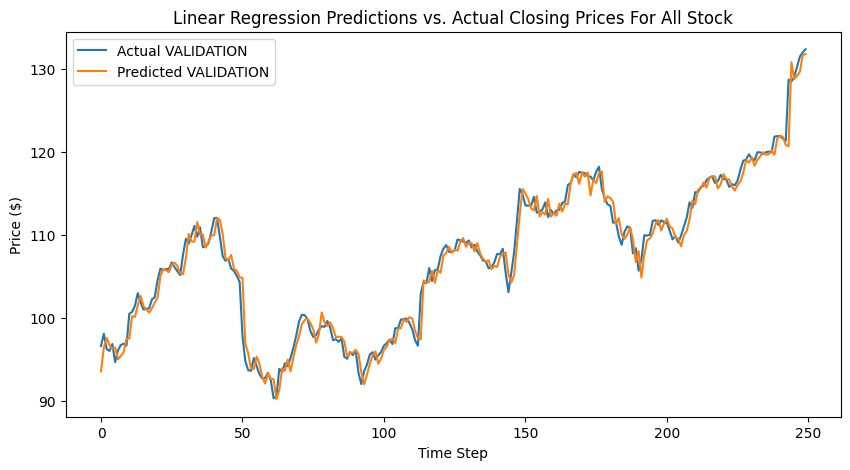

In [ ]:
# actual vs predicted (validation)
plt.figure(figsize=(10, 5))
plt.plot(y_val.values, label='Actual VALIDATION')
plt.plot(y_val_pred, label='Predicted VALIDATION')
plt.title('Linear Regression Predictions vs. Actual Closing Prices For AAPL Stock')
plt.xlabel('Time Step')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

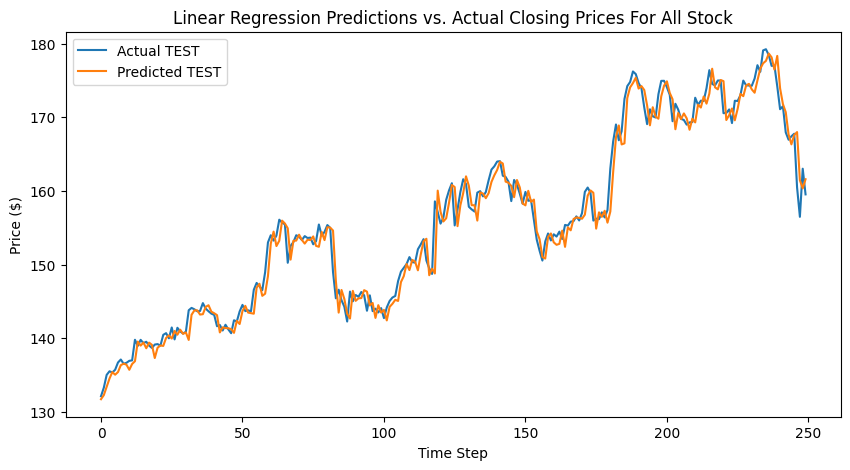

In [ ]:
# actual vs predicted (test)
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual TEST')
plt.plot(y_test_pred, label='Predicted TEST')
plt.title('Linear Regression Predictions vs. Actual Closing Prices For AAPL Stock')
plt.xlabel('Time Step')
plt.ylabel('Price ($)')
plt.legend()
plt.show()

**Save Model**

In [ ]:
import joblib
import os

model_dir = 'D:\\AI4ALL-Group-8C\\models'
model_filename = 'linear_regression.joblib'
model_path = os.path.join(model_dir, model_filename)

os.makedirs(model_dir, exist_ok=True)

# save the model
joblib.dump(model, model_path)
print(f"model saved to {model_path}")

model saved to D:\AI4ALL-Group-8C\models\aapl_linear_regression.joblib
